### The spark Foundation - Graduate Rotational Internship Program
#### Track : Data Science & Business Analytics
#### Name : Ali Mostafa Ali
#### Task2 : Prediction Using Unsupervised ML
#### Dataset URL : https://bit.ly/3kXTdox

### STEP 1 - importing The Data and know some inforamtion about Data

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#to ignore the warnings
import warnings as wg
wg.filterwarnings("ignore")


In [115]:
df=pd.read_csv('Iris.csv')

In [116]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [118]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [119]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [120]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [121]:
#we will drop the label column Species because it is an unsupervised learning problem
df2=df.drop(columns=['Species','Id'])
df2.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### STEP 2 - Finding the optimum number of clusters for K Means usig Elbow Mehod

In [122]:
from sklearn.cluster import KMeans
within_cluster_sum_of_square=[]
for i in range(1,11):
    k_means=KMeans(i)
    k_means.fit(df2)
    wcss_iter=k_means.inertia_
    within_cluster_sum_of_square.append(wcss_iter)

In [123]:
within_cluster_sum_of_square

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.94595367106238,
 34.299985543844244,
 29.881402210510913,
 28.238346654955347,
 26.341028616268897]

Each loop wcss is decrease and the the number of cluster is incerse till reach to 'elbow' 
point that expresses the number of cluster

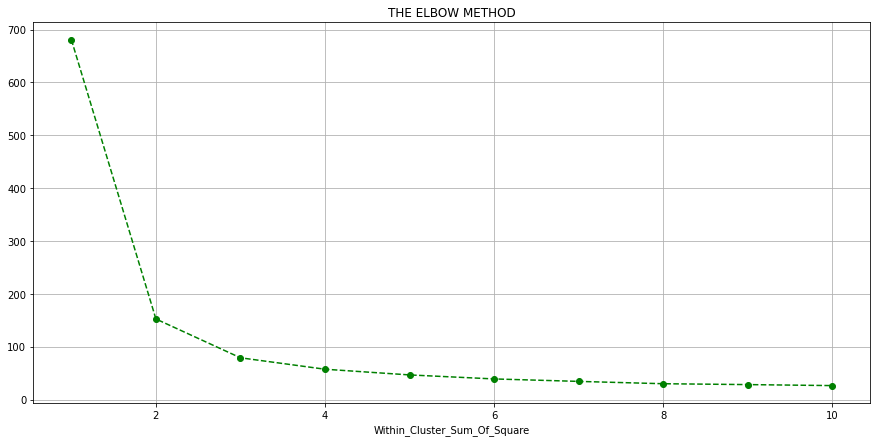

In [124]:
#plotting the'within_cluster_sum_of_square' against 'number_of_clusters'
number_of_clusters=range(1,11)
plt.plot(number_of_clusters,within_cluster_sum_of_square,'go--')
plt.title('THE ELBOW METHOD')
plt.xlabel('Number_of_clusters')
plt.xlabel('Within_Cluster_Sum_Of_Square')
plt.grid()


### STEP 3 - Applying kmeans to the dataset

In [125]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(df2)

In [126]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### STEP 4 - Visualizing the Clusters

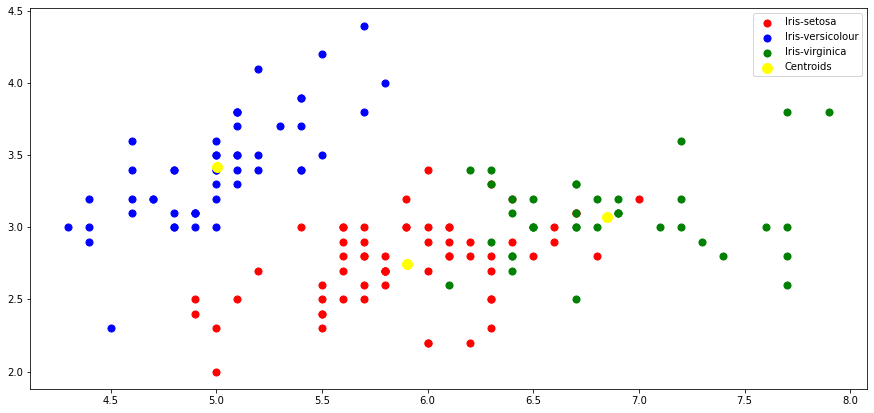

In [132]:
x=df2.iloc[:,[0,1,2,3]].values
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],s=50 ,color = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],s=50 ,color = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s=50 ,color = 'green', label = 'Iris-virginica')
plt.rcParams['figure.figsize']=[15,7]

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],s = 100, color = 'yellow', label = 'Centroids')
plt.legend()